In [1]:
using Pkg
# Pkg.activate("C:\\Research\\Encoder_Modeling\\Encoder_Analysis")

using Random
using StateSpaceDynamics
using Distributions
using Plots
using StatsBase
using CSV
using DataFrames
using LinearAlgebra
using MultivariateStats
using Glob
using Dates
include(".\\Zutils.jl")

# using StatsPlots

# For testing and debugging
Random.seed!(1234);

const SSD = StateSpaceDynamics

base_path = "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\"
session_folders = filter(isdir, glob("*", base_path))

8-element Vector{String}:
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R1"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_3d"
 "C:\\Research\\Encoder_Modeling\\En" ⋯ 17 bytes ⋯ "ocessed_Encoder\\R14_529_4thlick"
 "C:\\Research\\Encoder_Modeling\\En" ⋯ 18 bytes ⋯ "cessed_Encoder\\R14_Not_Filtered"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_Stragglers"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_ToInclude"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R16"
 "C:\\Research\\Encoder_Modeling\\En" ⋯ 21 bytes ⋯ "sed_Encoder\\TD15d_2024_11_25_P1"

In [11]:
# session_path = "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_529_4thlick\\TD15d_2024_11_25_P1\\";
session_path = "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\TD15d_2024_11_25_P1\\";
prb=1;

if prb == 1
    println("Probe 1 Processing -> Check this!")
    Probe1_R1, Probe2_R1, PCA_P1_R1, PCA_P2_R1, KP_R1, Jaw_R1 = load_data_encoder_noSVD(session_path, "R1")
    Probe1_R4, Probe2_R4, PCA_P1_R4, PCA_P2_R4, KP_R4, Jaw_R4 = load_data_encoder_noSVD(session_path, "R4")

    Probe1_R1_Cut, Probe2_R1_Cut, PCA_P1_R1_Cut, PCA_P2_R1_Cut, KP_R1_Cut, FCs_R1, SCs_R1, LRCs_R1, Tongue_mat_R1, Jaw_R1_Cut = load_data_encoder_cut_noSVD(session_path, "R1")
    Probe1_R4_Cut, Probe2_R4_Cut, PCA_P1_R4_Cut, PCA_P2_R4_Cut, KP_R4_Cut, FCs_R4, SCs_R4, LRCs_R4, Tongue_mat_R4, Jaw_R4_Cut = load_data_encoder_cut_noSVD(session_path, "R4")
else
    println("Probe 2 Processing -> Check this!")
    Probe11_R1, Probe1_R1, PCA_P11_R1, PCA_P1_R1, KP_R1, Jaw_R1 = load_data_encoder_noSVD(session_path, "R1")
    Probe11_R4, Probe1_R4, PCA_P11_R4, PCA_P1_R4, KP_R4, Jaw_R4 = load_data_encoder_noSVD(session_path, "R4")

    Probe11_R1_Cut, Probe1_R1_Cut, PCA_P11_R1_Cut, PCA_P1_R1_Cut, KP_R1_Cut, FCs_R1, SCs_R1, LRCs_R1, Tongue_mat_R1, Jaw_R1_Cut = load_data_encoder_cut_noSVD(session_path, "R1")
    Probe11_R4_Cut, Probe1_R4_Cut, PCA_P11_R4_Cut, PCA_P1_R4_Cut, KP_R4_Cut, FCs_R4, SCs_R4, LRCs_R4, Tongue_mat_R4, Jaw_R4_Cut = load_data_encoder_cut_noSVD(session_path, "R4")
end

Probe 1 Processing -> Check this!


([[-0.38521 -0.41089 … -0.40015 -0.42945; -0.38521 -0.41089 … -0.40015 -0.42945; … ; -0.38521 -0.41089 … -0.40015 -0.42945; -0.38521 -0.41089 … -0.40015 -0.42945], [-0.38521 31.067 … -0.40015 -0.42945; -0.38521 16.568 … -0.40015 -0.42945; … ; -0.38521 -0.41089 … -0.40015 -0.42945; -0.38521 -0.41089 … -0.40015 -0.42945], [-0.38521 -0.41089 … 42.459 -0.42945; -0.38521 -0.41089 … 31.078 -0.42945; … ; -0.38521 -0.41089 … -0.40015 -0.42945; -0.38521 -0.41089 … 42.459 -0.42945], [-0.38521 10.23 … -0.40015 -0.42945; -0.38521 1.5463 … -0.40015 -0.42945; … ; 49.201 -0.41089 … -0.40015 -0.42945; 33.05 -0.41089 … -0.40015 -0.42945], [-0.38521 33.024 … -0.40015 -0.42945; -0.38521 16.568 … -0.40015 -0.42945; … ; -0.38521 -0.41089 … -0.40015 -0.42945; -0.38521 -0.41089 … -0.40015 -0.42945], [-0.38521 6.3157 … -0.40015 16.55; -0.38521 1.5463 … -0.40015 6.2971; … ; -0.38521 -0.41089 … -0.40015 42.43; -0.38521 -0.41089 … -0.40015 31.048], [-0.38521 -0.41089 … -0.40015 -0.42945; -0.38521 -0.41089 … -0.4

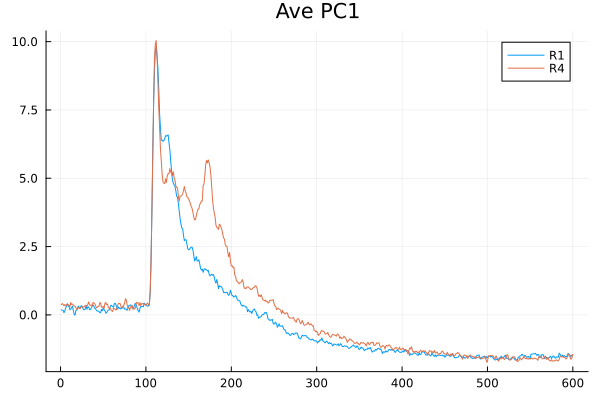

In [3]:
R1_Ave = average_PCs(PCA_P1_R1)
R4_Ave = average_PCs(PCA_P1_R4)
plot(R1_Ave[:,1], label="R1")
plot!(R4_Ave[:,1], label="R4")
title!("Ave PC1")

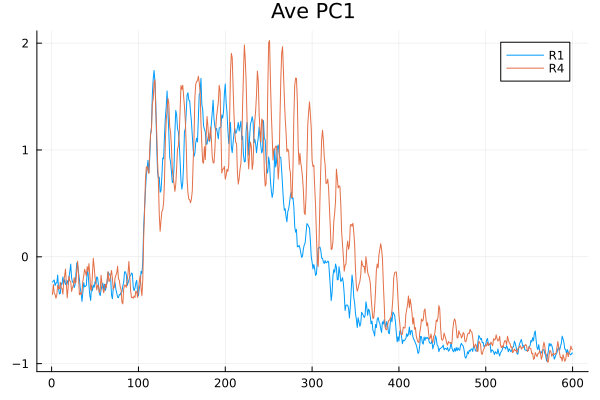

In [17]:
R1_Ave = average_PCs(PCA_P1_R1)
R4_Ave = average_PCs(PCA_P1_R4)
plot(R1_Ave[:,1], label="R1")
plot!(R4_Ave[:,1], label="R4")
title!("Ave PC1")




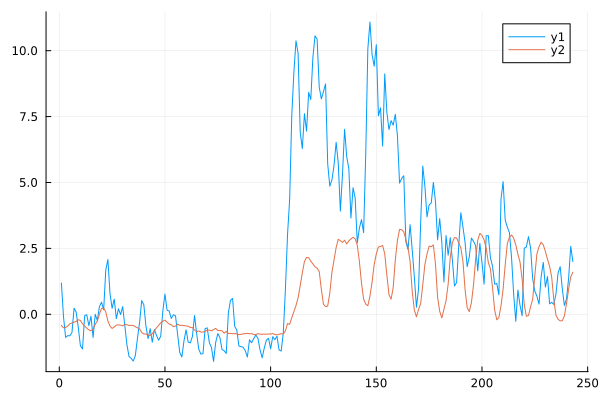

In [5]:
trial = 1
plot(PCA_P1_R1_Cut[trial][:,1])
plot!(KP_R1_Cut[trial][:,10])

In [12]:
"""
Remove NaN values
"""


# Assuming KP_R1 is a vector of matrices
for i in 1:length(KP_R1)
    # Replace NaN values in each matrix with 0
    KP_R1[i] .= replace(KP_R1[i], NaN => 0.0)
end

for i in 1:length(KP_R4)
    # Replace NaN values in each matrix with 0
    KP_R4[i] .= replace(KP_R4[i], NaN => 0.0)
end

# Assuming KP_R1 is a vector of matrices
for i in 1:length(KP_R1_Cut)
    # Replace NaN values in each matrix with 0
    KP_R1_Cut[i] .= replace(KP_R1_Cut[i], NaN => 0.0)
end

for i in 1:length(KP_R4_Cut)
    # Replace NaN values in each matrix with 0
    KP_R4_Cut[i] .= replace(KP_R4_Cut[i], NaN => 0.0)
end

In [5]:
"""
Omit certain kinematic features if necessary
"""

# 1:17, 20:24

KP_R4 = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R4]
KP_R1 = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R1]
KP_R4_Cut = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R4_Cut]
KP_R1_Cut = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R1_Cut]


161-element Vector{Matrix{Float64}}:
 [0.0070211 -0.075472 … -0.020332 -0.433; 0.0070211 -0.075472 … -0.020332 -0.28315; … ; -0.86453 -0.324 … -0.020332 0.65268; -0.06714 0.80863 … -0.43192 0.74845]
 [0.0070211 -0.075472 … -0.020332 0.88682; 0.0070211 -0.075472 … -0.020332 0.77366; … ; 0.0070211 -0.075472 … -0.020332 1.1967; 0.0070211 -0.075472 … 1.041 1.1828]
 [0.0070211 -0.075472 … -0.020332 0.24485; 0.0070211 -0.075472 … -0.020332 -0.17438; … ; -2.4663 -0.75416 … -0.52232 0.23807; -2.4087 -0.53799 … -0.84608 0.14697]
 [0.0070211 -0.075472 … -0.020332 0.95367; 0.0070211 -0.075472 … -0.020332 1.184; … ; 0.0070211 -3.5701 … 0.58068 1.1479; 0.0070211 -0.075472 … 0.8925 1.3825]
 [0.0070211 -0.075472 … -0.020332 0.053691; 0.0070211 -0.075472 … -0.020332 0.06323; … ; -4.3483 -2.6444 … -0.7253 -0.96884; -4.3633 -2.8554 … -0.8137 -0.75139]
 [0.0070211 -0.075472 … -0.020332 1.3883; 0.0070211 -0.075472 … -0.020332 1.3464; … ; -1.8726 -1.2109 … 0.2833 1.3616; -0.047549 -0.48106 … 0.26158 0.9276

In [13]:
"""
Prefit the encoder models
"""

println("Prefitting Encoders")
lags=4
leads = 0
start_time = 90
dif = 100-lags;

# Get enough data to create kernel and start at GC still
# X_R1 = [X[100-lags:end,:] for X in Jaw_R1]
# X_R4 = [X[100-lags:end,:] for X in Jaw_R4]

X_R1 = [X[start_time-lags+1:end,:] for X in KP_R1]
X_R4 = [X[start_time-lags+1:end,:] for X in KP_R4]


Y_R1 = [Y[start_time-lags+1:end, :] for Y in PCA_P1_R1]
Y_R4 = [Y[start_time-lags+1:end, :] for Y in PCA_P1_R4]

X_R1_kernel = kernelize_window_features(X_R1)
X_R4_kernel = kernelize_window_features(X_R4)

Y_R1_trimmed = kernelize_window_features(Y_R1)
Y_R4_trimmed = kernelize_window_features(Y_R4)


# Y_R1_trimmed = trim_Y_train_past(Y_R1)
# Y_R4_trimmed = trim_Y_train_past(Y_R4)

FCs_R4 = FCs_R4 .- start_time
FCs_R1 = FCs_R1 .- start_time

LRCs_R4 = LRCs_R4 .- start_time
LRCs_R1 = LRCs_R1 .- start_time

FCs = cat(FCs_R1, FCs_R4, dims=2)
LRCs= cat(LRCs_R1, LRCs_R4, dims=1)

X_R1 = [X_R1_kernel[i][(FCs_R1[i]-3):(FCs_R1[i]), :] for i in eachindex(X_R1_kernel)]
X_R4 = [X_R4_kernel[i][(FCs_R4[i]-3):(FCs_R4[i]+10), :] for i in eachindex(X_R4_kernel)]

Y_R1 = [Y_R1_trimmed[i][(FCs_R1[i]-3):(FCs_R1[i]), :] for i in eachindex(Y_R1_trimmed)]
Y_R4 = [Y_R4_trimmed[i][(FCs_R4[i]-3):(FCs_R4[i]+10), :] for i in eachindex(Y_R4_trimmed)]

X_eng = cat(X_R1, X_R4, dims=1)
Y_eng = cat(Y_R1, Y_R4, dims=1)

# X_eng = X_R1;
# Y_eng = Y_R1;


# X_R1 = [X_R1_kernel[i][LRCs_R1[i]-7:(LRCs_R1[i]), :] for i in eachindex(X_R1_kernel)]
# X_R4 = [X_R4_kernel[i][LRCs_R4[i]-7:(LRCs_R4[i]), :]  for i in eachindex(X_R4_kernel)]

# Y_R1 = [Y_R1_trimmed[i][LRCs_R1[i]-7:(LRCs_R1[i]), :]  for i in eachindex(Y_R1_trimmed)]
# Y_R4 = [Y_R4_trimmed[i][LRCs_R4[i]-7:(LRCs_R4[i]), :]  for i in eachindex(Y_R4_trimmed)]


# X_diseng = cat(X_R1, X_R4, dims=1)
# Y_diseng = cat(Y_R1, Y_R4, dims=1)

# Prefit engaged model
X_eng = vcat(X_eng...)
Y_eng = vcat(Y_eng...)

β_eng, Σ_eng = weighted_ridge_regression(X_eng, Y_eng, 0.01)

# # seems to be a problem with X
# X_diseng = vcat(X_diseng...)
# Y_diseng = vcat(Y_diseng...)

# β_diseng, Σ_diseng = weighted_ridge_regression(X_diseng, Y_diseng, 0.01)

Prefitting Encoders


([5.675050944224475 -1.5537552398519001 … -0.8036670031654591 -0.12640006079608834; 0.04491056408038712 0.16771485960914578 … -0.006345578119640417 -0.023459813659285546; … ; 0.21029346700893176 -0.14061587365828068 … 0.135707856143178 -0.10624982932746974; -0.7988778941063046 1.5136940203410096 … -0.34005901717981196 0.4085869989673145], [4.366904464930774 -1.774246547486173 … 0.2612099591557966 -0.3744248462749625; -1.774246547486173 2.7487851251406625 … -0.17992299480626509 0.6275954875488732; … ; 0.2612099591557966 -0.17992299480626509 … 1.0879990889204822 0.19523603118561642; -0.3744248462749625 0.6275954875488732 … 0.19523603118561642 1.6582366308250025])

Setting up switching model
A: [0.9999 0.0001; 0.0001 0.9999]
Iter: 1
A: [0.9407668672798396 0.059233132720166455; 0.015293592714288883 0.9847064072857122]
Iter: 2
A: [0.9376916901003616 0.06230830989964536; 0.015003879505690765 0.9849961204943084]
Iter: 3
A: [0.9322318084517017 0.067768191548301; 0.015828740581594863 0.984171259418403]
Iter: 4
A: [0.9287233621727107 0.0712766378272995; 0.0162560197360825 0.9837439802639152]
Iter: 5
A: [0.9269383070577577 0.07306169294224954; 0.016416236244922968 0.9835837637550779]
Iter: 6
A: [0.9255578695592087 0.07444213044079598; 0.016528370628560135 0.9834716293714394]
Iter: 7
A: [0.924611281167021 0.07538871883298819; 0.01659006304637055 0.9834099369536268]
Iter: 8
A: [0.9237372705400013 0.07626272946000683; 0.01668703587731485 0.9833129641226859]
Iter: 9
A: [0.9236072609256311 0.07639273907437569; 0.016639078651630473 0.9833609213483683]
Iter: 10
A: [0.9235407503163966 0.07645924968361498; 0.0166153604094641 0.9833846395905361]
Iter: 11
A: [0.923

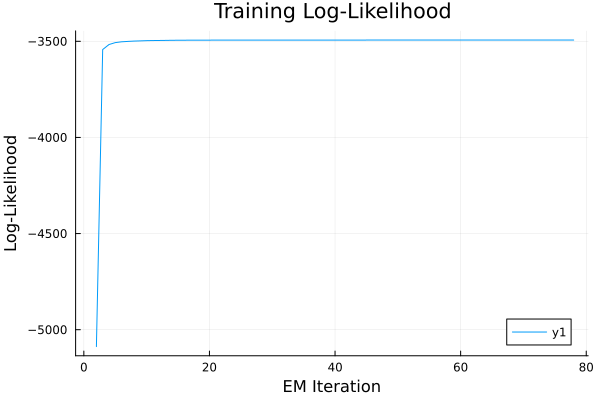

In [14]:
"""
Set up the switching encoder model
"""

println("Setting up switching model")

X_R1 = [X[start_time-lags:end,:] for X in KP_R1_Cut]
X_R4 = [X[start_time-lags:end,:] for X in KP_R4_Cut]
# X = cat(X_R1, X_R4, dims=1)

X = X_R1;
# deleteat!(X, 30)
# Y = cat(PCA_P1_R1_Cut, PCA_P1_R4_Cut, dims=1)
Y = PCA_P1_R1_Cut;

Y = [y[start_time-lags:end, :] for y in Y]
# deleteat!(Y, 30)

# X_ready = permutedims.(X_ready)
# Y_ready = permutedims.(Y_ready)

# X_ready = rand(size(X_ready)...)

X_kern = kernelize_window_features(X)
Y_trim = kernelize_window_features(Y)

# Y_trim = trim_Y_train_past(Y)

X_ready = permutedims.(X_kern)
Y_ready = permutedims.(Y_trim)
# Y_ready = [randn(size(y)) for y in Y_ready]


# Initialize the Gaussian HMM-GLM
model = SwitchingGaussianRegression(;K=2, input_dim=size(X_ready[1])[1], output_dim=size(Y_ready[1])[1], include_intercept=true)

model.B[1].β = β_eng
model.B[1].Σ = Σ_eng
model.B[1].λ = 0.0
model.B[2].λ = 0.0

# model.B[2].β = β_diseng
# model.B[2].Σ = Σ_eng

model.A = [0.9999 0.0001; 0.0001 0.9999]
model.πₖ = [0.0001; 0.9999]

lls = fit_custom!(model, Y_ready, X_ready, max_iters=100)

plot(lls)
title!("Training Log-Likelihood")
xlabel!("EM Iteration")
ylabel!("Log-Likelihood")

In [15]:
diff(lls)

77-element Vector{Float64}:
   Inf
 1544.864566672879
   26.055597765287985
    9.991951589850032
    4.236847699022292
    2.0458149187052186
    1.7238129895758902
    1.0213485293775193
    1.1452069026372556
    0.6003088907536949
    ⋮
   -4.53379152531852e-6
   -3.6346232263895217e-6
   -2.9385078050836455e-6
   -2.39109840549645e-6
   -1.955032075784402e-6
   -1.6040798982430715e-6
   -1.3193744052841794e-6
   -1.0870344340219162e-6
   -8.965889719547704e-7

Calculating average inference


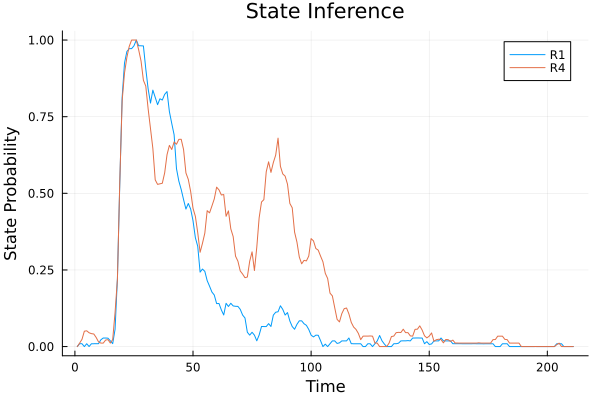

In [16]:
"""
Plot the trial averaged inference
"""

println("Calculating average inference")
X_R1 = [X[start_time-lags:300,:] for X in KP_R1]
X_R4 = [X[start_time-lags:300,:] for X in KP_R4]

Y_R1 = [Y[start_time-lags:300,:] for Y in PCA_P1_R1]
Y_R4 = [Y[start_time-lags:300, :] for Y in PCA_P1_R4]

X_R1_kernel = kernelize_window_features(X_R1)
X_R4_kernel = kernelize_window_features(X_R4)

Y_R1_trimmed = kernelize_window_features(Y_R1)
Y_R4_trimmed = kernelize_window_features(Y_R4)

# Y_R1_trimmed = trim_Y_train_past(Y_R1)
# Y_R4_trimmed = trim_Y_train_past(Y_R4)

YY = permutedims.(Y_R1_trimmed)
XX = permutedims.(X_R1_kernel)

YY_R4 = permutedims.(Y_R4_trimmed)
XX_R4 = permutedims.(X_R4_kernel)


FB_R1 = label_data(model, YY, XX);
FB_R4 = label_data(model, YY_R4, XX_R4);

V1 = SSD.viterbi(model, YY, XX);
V4 = SSD.viterbi(model, YY_R4, XX_R4);

# Extract γ[1, :] for each K in OO
γ_vectors_R1 = [FB_R1[K].γ[1, :] for K in eachindex(FB_R1)]
γ_mean_R1 = mean(exp.(hcat(γ_vectors_R1...)), dims=2)

γ_vectors_R4 = [FB_R4[K].γ[1, :] for K in eachindex(FB_R4)]
γ_mean_R4 = mean(exp.(hcat(γ_vectors_R4...)), dims=2)

plot(γ_mean_R1; label="R1")
plot!(γ_mean_R4; label="R4")
title!("State Inference")
ylabel!("State Probability")
xlabel!("Time")

In [17]:
"""
Look at single trial PC predictions
"""

Tongue_R1 = Tongue_mat_R1[start_time:300, :];
Tongue_R4 = Tongue_mat_R4[start_time:300, :];

# Save the data to export to MATLAB figure making
R4_Tongue = permutedims(hcat(Tongue_R4...))
R1_Tongue = permutedims(hcat(Tongue_R1...))
R4_States = permutedims(hcat(γ_vectors_R4...))
R1_States = permutedims(hcat(γ_vectors_R1...))

R4_Vit = permutedims(hcat(V4...))
R1_Vit = permutedims(hcat(V1...))

# Convert matrices to DataFrames, using :auto for column names (if you don't want specific column names)
Tongue_R4 = Tongue_R4[1:201, :];
Tongue_R1 = Tongue_R1[1:201, :];

R4_Tongue_df = DataFrame(permutedims(Tongue_R4), :auto)
R1_Tongue_df = DataFrame(permutedims(Tongue_R1), :auto)


# Get predictions at each time point from the correct emission model based on the state
trial = 1;

X_trial = X_R4_kernel[trial];
Y_trial = Y_R4_trimmed[trial];
T, D = size(X_trial)
_, O = size(Y_trial)  # O = output dimension

# Initialize prediction matrix
y_pred = zeros(T, O)

for i in 1:size(X_trial,1)
# Find the state
state = exp(R4_States[trial,i])

N, D = size(X_trial)
X_bias = hcat(ones(N), X_trial)  # Add intercept column
#    X_bias = X_trial

if state == 1.0
    y_pred[i,:] = (reshape(X_bias[i, :], 1,:) * model.B[1].β)
else
    y_pred[i,:] = (reshape(X_bias[i, :], 1,:) * model.B[2].β)
end
end

PC = 1
r2_score(Y_trial[:,PC], y_pred[:,PC])

0.5722823890503954

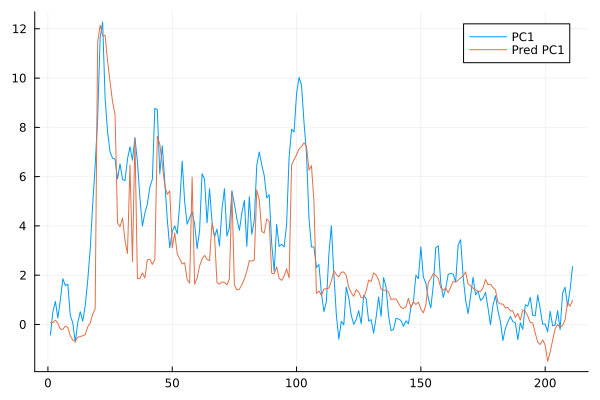

In [18]:
plot(Y_trial[:,PC], label="PC1")
plot!(y_pred[:,PC], label="Pred PC1")

In [19]:
"""
Calculate average PC prediction accuracy
"""

num_trials = length(X_R4_kernel)
_, O = size(Y_R4_trimmed[1])  # O = number of PCs (output dims)

# Initialize matrix to store R² scores (trials × PCs)
r2_scores = zeros(num_trials, O)

for trial in 1:num_trials
    X_trial = X_R4_kernel[trial]
    Y_trial = Y_R4_trimmed[trial]
    T, D = size(X_trial)

    # Initialize prediction matrix
    y_pred = zeros(T, O)

    # Add bias term (intercept)
    X_bias = hcat(ones(T), X_trial)

    for i in 1:T
        # Find the state (use exp because you stored log probs?)
        state = exp(R4_States[trial, i])

        if state == 1.0
            y_pred[i, :] = reshape(X_bias[i, :], 1, :) * model.B[1].β
        else
            y_pred[i, :] = reshape(X_bias[i, :], 1, :) * model.B[2].β
        end
    end

    # Now compute R² for each PC
    for pc in 1:O
        r2_scores[trial, pc] = r2_score(Y_trial[:, pc], y_pred[:, pc])
    end
end

mean_r2_per_pc = mean(r2_scores, dims=1)  # 1 × 12 matrix
mean_r2_per_pc = vec(mean_r2_per_pc)      # convert to 12-element Vector

50-element Vector{Float64}:
  0.5689276745896652
  0.3629559001591995
  0.03746096506762483
  0.07913321611790476
  0.08919156017416681
 -0.23205959050310918
  0.10276408224049177
  0.07618436206125677
  0.046051332540985195
 -0.0386900708207569
  ⋮
  0.3916297886195199
  0.0449453077789931
  0.10494920006801838
  0.10924972514015291
 -0.2177723585008133
  0.09804770950770103
  0.09171762063271646
  0.05449299462055415
 -0.034282418055452756

In [57]:
"""
Visualization of I/O + State Inference
"""

trial = 1
x = 1:length(R1_States[trial, :])

X_R1_trimmed = trim_Y_train_past(X_R1, lags)


plot(
    plot(x, exp.(R1_States[trial, :]), label="State Inference", ylabel="State", legend=:topright, title="Single Trial Inference and Features"),
    plot(x, Tongue_R1[:, trial], label="Tongue", ylabel="Tongue", legend=:topright),
    plot(x, X_R1_trimmed[trial][:,1], label="KP") |> p -> plot!(p, x, X_R1_trimmed[trial][:,2], label="KP", ylabel="KP"),
    plot(x, Y_R1_trimmed[trial][:,:], label=false),
    layout = @layout([a; b; c; d]),
    link = :x,
    size=(800,600),
)

In [22]:
size(R4_States)

(109, 211)

In [11]:

"""
VITERBI STATES SAVED
"""
session = splitpath(session_path)[end]
session_save = replace(session, "-" => "_")

if !isdir(joinpath("Results_Window\\" *session_save))
    mkpath(joinpath("Results_Window\\" *session_save))
end

println("SAVE PATH", (joinpath("Results_Window\\" *session_save, "R14_PC_R2_Reg.csv")))

R4_States_Vit_df = DataFrame(R4_Vit, :auto)
R1_States_Vit_df = DataFrame(R1_Vit, :auto)
R4_States_df = DataFrame(R4_States, :auto)
R1_States_df = DataFrame(R1_States, :auto)

println("HEREHRHEHR")

# Wrap vector into a DataFrame
# Convert to DataFrame
mean_r2_df = DataFrame(mean_r2_per_pc', :auto)  # make it a 1×12 DataFrame

println("HERE")
println(session_save)
# Save
CSV.write(joinpath("Results_Window\\" *session_save, "R14_PC_R2_Reg.csv"), mean_r2_df; header=false)
println("EHRHEHEHE")
CSV.write(joinpath("Results_Window\\" *session_save, "R14_Tongue_Reg.csv"), R4_Tongue_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R1_Tongue_Reg.csv"), R1_Tongue_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R14_States_Reg.csv"), R4_States_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R1_States_Reg.csv"), R1_States_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R14_States_Vit_Reg.csv"), R4_States_Vit_df; header=false)
CSV.write(joinpath("Results_Window\\" *session_save, "R1_States_Vit_Reg.csv"), R1_States_Vit_df; header=false)

println("SESSION DATA SAVED")

SAVE PATHResults_Window\TD3d_2023_04_15_P1\R14_PC_R2_Reg.csv
HEREHRHEHR
HERE
TD3d_2023_04_15_P1
EHRHEHEHE
SESSION DATA SAVED
